In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
columns_names = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("ml-100k/u.data",sep = '\t',names = columns_names)
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [3]:
df.shape

(100000, 4)

In [4]:
df['user_id'].nunique() # their are 943 unique users

943

In [5]:
df['item_id'].nunique() # their are 1682 unique movies

1682

In [6]:
movies_titles = pd.read_csv('ml-100k/u.item',sep = "\|",header = None)
movies_titles

0                                          1            2   3   \
0        1                           Toy Story (1995)  01-Jan-1995 NaN   
1        2                           GoldenEye (1995)  01-Jan-1995 NaN   
2        3                          Four Rooms (1995)  01-Jan-1995 NaN   
3        4                          Get Shorty (1995)  01-Jan-1995 NaN   
4        5                             Copycat (1995)  01-Jan-1995 NaN   
...    ...                                        ...          ...  ..   
1677  1678                          Mat' i syn (1997)  06-Feb-1998 NaN   
1678  1679                           B. Monkey (1998)  06-Feb-1998 NaN   
1679  1680                       Sliding Doors (1998)  01-Jan-1998 NaN   
1680  1681                        You So Crazy (1994)  01-Jan-1994 NaN   
1681  1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996 NaN   

                                                     4   5   6   7   8   9   \
0     http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1   
1     http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0   
2     http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0   
3     http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0   
4     http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0   
...                                                 ...  ..  ..  ..  ..  ..   
1677  http://us.imdb.com/M/title-exact?Mat%27+i+syn+...   0   0   0   0   0   
1678  http://us.imdb.com/M/title-exact?B%2E+Monkey+(...   0   0   0   0   0   
1679      http://us.imdb.com/Title?Sliding+Doors+(1998)   0   0   0   0   0   
1680  http://us.imdb.com/M/title-exact?You%20So%20Cr...   0   0   0   0   0   
1681  http://us.imdb.com/M/title-exact?Schrei%20aus%...   0   0   0   0   0   

      ...  14  15  16  17  18  19  20  21  22  23  
0     ...   0   0   0   0   0   0   0   0   0   0  
1     ...   0   0   0   0   0   0   0   1   0   0  
2     ...   0   0   0   0   0   0   0   1   0   0  
3     ...   0   0   0   0   0   0   0   0   0   0  
4     ...   0   0   0   0   0   0   0   1   0   0  
...   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1677  ...   0   0   0   0   0   0   0   0   0   0  
1678  ...   0   0   0   0   0   1   0   1   0   0  
1679  ...   0   0   0   0   0   1   0   0   0   0  
1680  ...   0   0   0   0   0   0   0   0   0   0  
1681  ...   0   0   0   0   0   0   0   0   0   0  

[1682 rows x 24 columns]

In [7]:
movies_titles.shape

(1682, 24)

In [8]:
movies_titles = movies_titles[[0,1]]
movies_titles.columns = ['item_id','title']
movies_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [9]:
df = pd.merge(df,movies_titles,on ="item_id" )
df.tail()

user_id  item_id  rating  timestamp  \
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                   title  
99995                                  Mamma Roma (1962)  
99996                             Eighth Day, The (1996)  
99997                                  Girls Town (1996)  
99998  Silence of the Palace, The (Saimt el Qusur) (1...  
99999                                    Dadetown (1995)

# Exploratory Data Analysis 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [11]:
df.groupby('title').mean()

user_id  item_id    rating  \
title                                                                  
'Til There Was You (1997)              383.777778   1300.0  2.333333   
1-900 (1994)                           477.000000   1353.0  2.600000   
101 Dalmatians (1996)                  450.330275    225.0  2.908257   
12 Angry Men (1957)                    453.552000    178.0  4.344000   
187 (1997)                             517.097561    330.0  3.024390   
...                                           ...      ...       ...   
Young Guns II (1990)                   504.068182   1188.0  2.772727   
Young Poisoner's Handbook, The (1995)  452.487805    547.0  3.341463   
Zeus and Roxanne (1997)                532.833333   1164.0  2.166667   
unknown                                311.888889    267.0  3.444444   
Á köldum klaka (Cold Fever) (1994)     655.000000   1633.0  3.000000   

                                          timestamp  
title                                                
'Til There Was You (1997)              8.861152e+08  
1-900 (1994)                           8.797260e+08  
101 Dalmatians (1996)                  8.829281e+08  
12 Angry Men (1957)                    8.828963e+08  
187 (1997)                             8.850084e+08  
...                                             ...  
Young Guns II (1990)                   8.821855e+08  
Young Poisoner's Handbook, The (1995)  8.821438e+08  
Zeus and Roxanne (1997)                8.775338e+08  
unknown                                8.756379e+08  
Á köldum klaka (Cold Fever) (1994)     8.893313e+08  

[1664 rows x 4 columns]

In [12]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [13]:
df.groupby('title').count()

user_id  item_id  rating  timestamp
title                                                                     
'Til There Was You (1997)                    9        9       9          9
1-900 (1994)                                 5        5       5          5
101 Dalmatians (1996)                      109      109     109        109
12 Angry Men (1957)                        125      125     125        125
187 (1997)                                  41       41      41         41
...                                        ...      ...     ...        ...
Young Guns II (1990)                        44       44      44         44
Young Poisoner's Handbook, The (1995)       41       41      41         41
Zeus and Roxanne (1997)                      6        6       6          6
unknown                                      9        9       9          9
Á köldum klaka (Cold Fever) (1994)           1        1       1          1

[1664 rows x 4 columns]

In [14]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

## create data frames of ratings

In [15]:
ratings = pd.DataFrame((df.groupby('title').mean()['rating']))
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [16]:
ratings['num of ratings'] = pd.DataFrame((df.groupby('title').count()['rating']))
ratings.sort_values(by='rating',ascending = False)

rating  num of ratings
title                                                               
They Made Me a Criminal (1939)                   5.0               1
Marlene Dietrich: Shadow and Light (1996)        5.0               1
Saint of Fort Washington, The (1993)             5.0               2
Someone Else's America (1995)                    5.0               1
Star Kid (1997)                                  5.0               3
...                                              ...             ...
Eye of Vichy, The (Oeil de Vichy, L') (1993)     1.0               1
King of New York (1990)                          1.0               1
Touki Bouki (Journey of the Hyena) (1973)        1.0               1
Bloody Child, The (1996)                         1.0               1
Crude Oasis, The (1995)                          1.0               1

[1664 rows x 2 columns]

## plot the histogram of 'num of ratings'

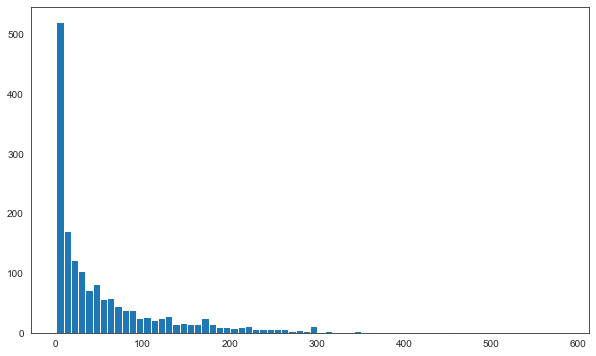

In [17]:
plt.figure(figsize = (10,6))
plt.hist(ratings['num of ratings'],bins = 70)
plt.show()

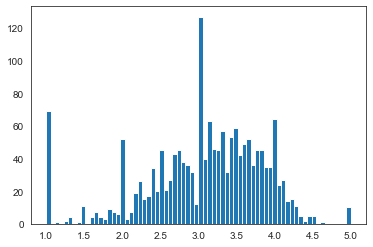

In [18]:
plt.hist(ratings['rating'],bins = 70)
plt.show()

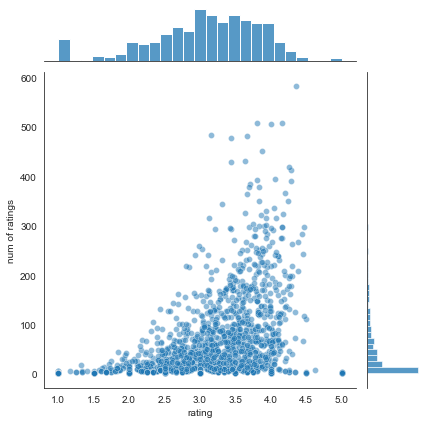

In [19]:
sns.jointplot(x='rating',y='num of ratings',data = ratings,alpha = .5)

## Create Movie Recommendation 

In [20]:
df.head()

user_id  item_id  rating  timestamp         title
0      196      242       3  881250949  Kolya (1996)
1       63      242       3  875747190  Kolya (1996)
2      226      242       5  883888671  Kolya (1996)
3      154      242       3  879138235  Kolya (1996)
4      306      242       5  876503793  Kolya (1996)

In [21]:
movie_matrix = df.pivot_table(index = 'user_id' , columns = 'title',values = "rating" )
movie_matrix.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   
5        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   
5                        NaN                        4.0                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   
5                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                                 NaN  
3                            NaN      NaN                    

In [22]:
ratings.sort_values('num of ratings',ascending = False).head()

rating  num of ratings
title                                              
Star Wars (1977)           4.358491             583
Contact (1997)             3.803536             509
Fargo (1996)               4.155512             508
Return of the Jedi (1983)  4.007890             507
Liar Liar (1997)           3.156701             485

In [23]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()


user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [24]:
# correlate this with whole movie matrix

In [25]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [26]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns = ['correlation'] )
corr_starwars.dropna(inplace = True)
corr_starwars.head() # so we can suggest that movie which has highest correlation

correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [27]:
corr_starwars.sort_values('correlation',ascending = False).head(10)

correlation
title                                                          
Man of the Year (1995)                                      1.0
Hollow Reed (1996)                                          1.0
Stripes (1981)                                              1.0
Beans of Egypt, Maine, The (1994)                           1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0
Line King: Al Hirschfeld, The (1996)                        1.0
Hurricane Streets (1998)                                    1.0
Good Man in Africa, A (1994)                                1.0
Safe Passage (1994)                                         1.0

In [28]:
ratings

rating  num of ratings
title                                                          
'Til There Was You (1997)              2.333333               9
1-900 (1994)                           2.600000               5
101 Dalmatians (1996)                  2.908257             109
12 Angry Men (1957)                    4.344000             125
187 (1997)                             3.024390              41
...                                         ...             ...
Young Guns II (1990)                   2.772727              44
Young Poisoner's Handbook, The (1995)  3.341463              41
Zeus and Roxanne (1997)                2.166667               6
unknown                                3.444444               9
Á köldum klaka (Cold Fever) (1994)     3.000000               1

[1664 rows x 2 columns]

In [29]:
corr_starwars

correlation
title                                             
'Til There Was You (1997)                 0.872872
1-900 (1994)                             -0.645497
101 Dalmatians (1996)                     0.211132
12 Angry Men (1957)                       0.184289
187 (1997)                                0.027398
...                                            ...
Young Guns (1988)                         0.186377
Young Guns II (1990)                      0.228615
Young Poisoner's Handbook, The (1995)    -0.007374
Zeus and Roxanne (1997)                   0.818182
unknown                                   0.723123

[1410 rows x 1 columns]

In [30]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

correlation  num of ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

In [31]:
# only recommend those movies that have no. of rated user is above 100

In [32]:
corr_starwars[corr_starwars['num of ratings']>100] 

correlation  num of ratings
title                                                                    
101 Dalmatians (1996)                            0.211132             109
12 Angry Men (1957)                              0.184289             125
2001: A Space Odyssey (1968)                     0.230884             259
Absolute Power (1997)                            0.085440             127
Abyss, The (1989)                                0.203709             151
...                                                   ...             ...
Willy Wonka and the Chocolate Factory (1971)     0.221902             326
Wizard of Oz, The (1939)                         0.266335             246
Wrong Trousers, The (1993)                       0.216204             118
Young Frankenstein (1974)                        0.192589             200
Young Guns (1988)                                0.186377             101

[334 rows x 2 columns]

In [33]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation',ascending = False) 

correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.747981   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   
...                                                         ...   
Edge, The (1997)                                      -0.127167   
As Good As It Gets (1997)                             -0.130466   
Crash (1996)                                          -0.148507   
G.I. Jane (1997)                                      -0.176734   
First Wives Club, The (1996)                          -0.194496   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               583  
Empire Strikes Back, The (1980)                                367  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130  
...                                                            ...  
Edge, The (1997)                                               113  
As Good As It Gets (1997)                                      112  
Crash (1996)                                                   128  
G.I. Jane (1997)                                               175  
First Wives Club, The (1996)                                   160  

[334 rows x 2 columns]

## Predict Function

In [37]:
def predict_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns = ['correlation'] )
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    prediction = corr_movie[corr_movie['num of ratings']>100].sort_values('correlation',ascending = False)
    
    return prediction
predictions = predict_movies("Titanic (1997)")
predictions.head()
    
    
    
    

correlation  num of ratings
title                                                    
Titanic (1997)                   1.000000             350
River Wild, The (1994)           0.497600             146
Abyss, The (1989)                0.472103             151
Bram Stoker's Dracula (1992)     0.443560             120
True Lies (1994)                 0.435104             208